# 1.匯入資料

In [28]:
#Academic year       學年
#semester            學期
#School Name        本地學校銘曾
#country            進修國家
#school             進修學校
#Number of people   進修人數

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#政府開放資料平台 - 大學校院本國學生出國進修交流數 http://data.gov.tw/node/24730
df = pd.read_csv('python_homework.csv', encoding='big5')
df[:10]

,Academic year,semester,School Name,country,school,Number of people
0,NaN,NaN,NaN,NaN,NaN,NaN
1,101.0,1.0,國立政治大學,大陸地區,上海交通大學,1.0
2,101.0,1.0,國立政治大學,日本,佐賀大學,1.0
3,101.0,1.0,國立政治大學,英國,倫敦大學,1.0
4,101.0,1.0,國立政治大學,德意志聯邦共和國,慕尼黑大學,1.0
5,101.0,1.0,國立政治大學,大陸地區,廈門大學,1.0
6,101.0,1.0,國立政治大學,大韓民國(南韓),釜山大學,1.0
7,101.0,1.0,國立政治大學,加拿大,蒙特婁商學院,1.0
8,101.0,1.0,國立政治大學,土耳其共和國,安卡拉大學,7.0
9,101.0,1.0,國立政治大學,土耳其共和國,畢爾坎特大學,1.0


# 2.資料預處理

In [29]:
#捨棄遺失值
df = df[df['Number of people'].notnull()]
df[:10]

,Academic year,semester,School Name,country,school,Number of people
1,101.0,1.0,國立政治大學,大陸地區,上海交通大學,1.0
2,101.0,1.0,國立政治大學,日本,佐賀大學,1.0
3,101.0,1.0,國立政治大學,英國,倫敦大學,1.0
4,101.0,1.0,國立政治大學,德意志聯邦共和國,慕尼黑大學,1.0
5,101.0,1.0,國立政治大學,大陸地區,廈門大學,1.0
6,101.0,1.0,國立政治大學,大韓民國(南韓),釜山大學,1.0
7,101.0,1.0,國立政治大學,加拿大,蒙特婁商學院,1.0
8,101.0,1.0,國立政治大學,土耳其共和國,安卡拉大學,7.0
9,101.0,1.0,國立政治大學,土耳其共和國,畢爾坎特大學,1.0
10,101.0,1.0,國立政治大學,大韓民國(南韓),翰林大學,1.0


# 3.資料聚合

In [30]:
#聚合資料，去不同學校的表格
df2 = df.groupby(['Academic year','semester','School Name','country','school'])[['Number of people']].sum()
df2[-10:]

Number of people
Academic year semester School Name country  school                                                         
103.0         1.0      高雄醫學大學      澳門       澳門社會工作人員協進會                                                 8.0
                                   美國       北卡羅來納大學                                                     8.0
                                            哈佛大學                                                       10.0
                                            美國熱帶醫學會第63屆年度會議                                             1.0
                                   邦交國索羅門群島 中央醫院/中華民國駐索羅門群島臺灣衛生中心/Good Samaritan Hospital               6.0
                                   香港       香港中文大學                                                     11.0
                       龍華科技大學      大韓民國(南韓) 仁德大學                                                        2.0
                                   日本       秋田大學                                                        2.0
                                   美國       匹茲堡大學                                                       1.0
                                            楊格城大學                                                       2.0

In [31]:
#聚合資料，每學期該學校交換生的表格
df3 = df.groupby(['Academic year','semester','School Name'],as_index=False)[['Number of people']].sum() # as_index 讓標籤還在
df3[:10]

,Academic year,semester,School Name,Number of people
0,101.0,1.0,世新大學,11.0
1,101.0,1.0,中原大學,59.0
2,101.0,1.0,中國文化大學,152.0
3,101.0,1.0,中國科技大學,1.0
4,101.0,1.0,中國醫藥大學,72.0
5,101.0,1.0,中山醫學大學,43.0
6,101.0,1.0,中臺科技大學,5.0
7,101.0,1.0,中華大學,5.0
8,101.0,1.0,中華醫事科技大學,1.0
9,101.0,1.0,亞東技術學院,1.0


In [32]:
#聚合資料，每學期台灣的大學與科大的交換生表格
df4 = df.groupby(['Academic year','semester'],as_index=False)[['Number of people']].sum() # as_index 讓標籤還在
df4[:10]

,Academic year,semester,Number of people
0,101.0,1.0,6231.0
1,101.0,2.0,6937.0
2,102.0,1.0,6755.0
3,102.0,2.0,8457.0
4,103.0,1.0,7462.0


# 4.資料分析方法

#統計分析

In [33]:
#以學校為標準
#生成各種匯總的統計分析
#顯示人數統計分析
df3.describe()['Number of people']  

count    625.00000
mean      57.34720
std       95.72406
min        1.00000
25%        9.00000
50%       24.00000
75%       63.00000
max      964.00000
Name: Number of people, dtype: float64

In [34]:
#不分校，以全部大學科大做分析
#生成各種匯總的統計分析
#顯示人數統計分析
df4.describe()['Number of people'] 

count       5.000000
mean     7168.400000
std       844.075708
min      6231.000000
25%      6755.000000
50%      6937.000000
75%      7462.000000
max      8457.000000
Name: Number of people, dtype: float64

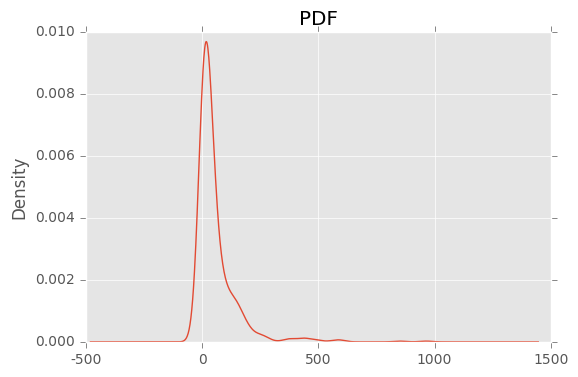

In [54]:
#機率密度以各校作分析
#人數進行常態分佈
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
df3['Number of people'].plot(kind='kde',title="PDF")

In [36]:
#常態分佈上限，以各校作分析
print('最大值',df3['Number of people'].mean() + 3 * df3['Number of people'].std())

最大值 344.5193790949707


In [37]:
#列出超過常態分佈上限的值
print('超過最大值的異常值',df3[df3['Number of people'] > df3['Number of people'].mean() + 3 * df3['Number of people'].std()])

超過最大值的異常值      Academic year  semester School Name  Number of people
37           101.0       1.0      國立政治大學             379.0
55           101.0       1.0      國立臺灣大學             964.0
95           101.0       1.0        淡江大學             434.0
157          101.0       2.0      國立政治大學             363.0
176          101.0       2.0      國立臺灣大學             568.0
211          101.0       2.0        東海大學             383.0
216          101.0       2.0        淡江大學             423.0
282          102.0       1.0      國立政治大學             369.0
301          102.0       1.0      國立臺灣大學             850.0
345          102.0       1.0        淡江大學             439.0
407          102.0       2.0      國立政治大學             492.0
471          102.0       2.0        淡江大學             460.0
488          102.0       2.0        逢甲大學             593.0
537          103.0       1.0      國立政治大學             437.0
554          103.0       1.0      國立臺灣大學             591.0
599          103.0       1.0        淡江大學      

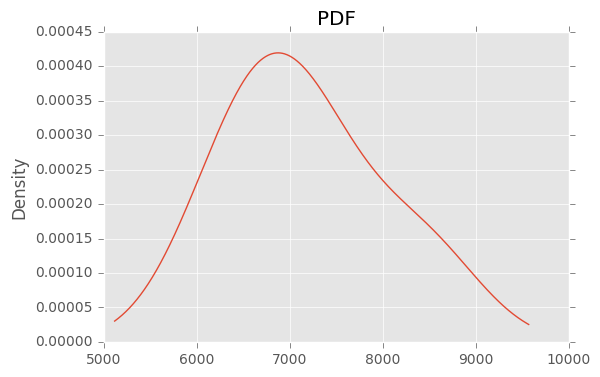

In [55]:
#機率密度，以全部大學科大做分析
#人數進行常態分佈
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
df4['Number of people'].plot(kind='kde',title="PDF")

In [39]:
#常態分佈上限，以全部大學科大做分析
print('最大值',df4['Number of people'].mean() + 3 * df4['Number of people'].std())

最大值 9700.627122514881


In [40]:
#列出超過常態分佈上限的值，以全部大學科大做分析
print('超過最大值的異常值',df4[df4['Number of people'] > df4['Number of people'].mean() + 3 * df4['Number of people'].std()])

超過最大值的異常值 Empty DataFrame
Columns: [Academic year, semester, Number of people]
Index: []


# 主因素分析 80%-20%

In [41]:
#主因素分析
df33 = df3.sort_values(by=['Number of people'],ascending=False).reset_index(drop=True)
#ascending 排序，False為大到小
df33[:10]

,Academic year,semester,School Name,Number of people
0,101.0,1.0,國立臺灣大學,964.0
1,102.0,1.0,國立臺灣大學,850.0
2,102.0,2.0,逢甲大學,593.0
3,103.0,1.0,國立臺灣大學,591.0
4,101.0,2.0,國立臺灣大學,568.0
5,102.0,2.0,國立政治大學,492.0
6,103.0,1.0,淡江大學,492.0
7,102.0,2.0,淡江大學,460.0
8,102.0,1.0,淡江大學,439.0
9,103.0,1.0,國立政治大學,437.0


In [42]:
#人數佔總人數百分比 (累積)
p = []
for i in range(len(df33)):
    x= df33['Number of people'][i]/sum(df33['Number of people'])   #人數 除以 所有的人數
    if(i!=0):
        p.append(x+p[i-1])   #累積
    else:
        p.append(x)
p[:10]

[0.026895820545728474,
 0.050611015010323085,
 0.067155850677975554,
 0.083644885888064277,
 0.099492215836169851,
 0.11321912839685284,
 0.12694604095753584,
 0.13978014619719881,
 0.15202834663244238,
 0.1642207466101222]

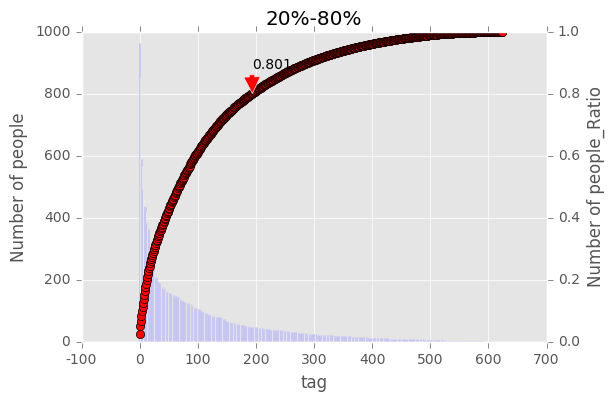

In [43]:
fig, ax1 =plt.subplots()  #其中的子圖
ax1.bar(df33.index,df33['Number of people'],align='center',color='blue')  #圖一用bar 顯示
ax1.set_ylabel('Number of people')   #圖一 y軸
ax1.set_xlabel('tag')  #圖一 x軸

#圖二
ax2 = ax1.twinx()  #ax2共用ax1的x軸
ax2.plot(df33.index,p , 'r-o')  #點線的顯示方式
ax2.set_ylabel('Number of people_Ratio')   #圖二 y軸
ax2.grid(False)   #關閉圖二的格線

#標記過80%的點
for i in range(len(p)):
    if(p[i]>0.8):   #當 p>0.8 進行標註
        ax2.annotate(round(p[i],3),xy=(df.index[i],p[i]),  #在折線圖進行標註， round為取四捨五入, xy為要標註的點
                     xytext=(df33.index[i],p[i]+0.08),# xy=(箭頭的點),xytext=(標註文字)
                     arrowprops=dict(facecolor='red')) #箭頭的顏色
        break
#plt.xticks(df33.index,df33['Number of people'])  #在x軸加上文字
plt.title('20%-80%')  
plt.show()

# 5.視覺化

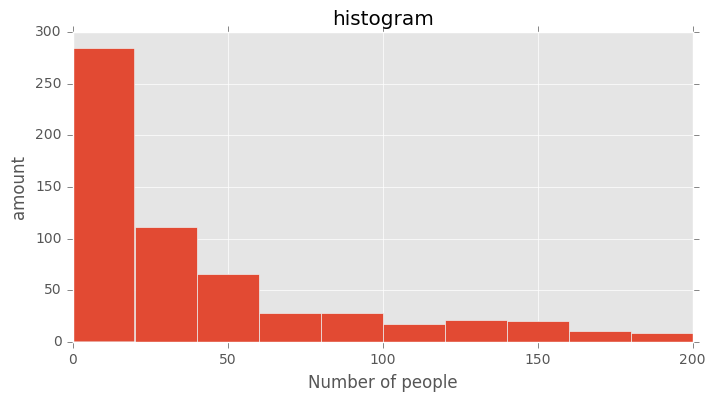

In [65]:
# histogram 直方圖
fig= plt.figure(figsize=(8,4))
plt.hist(df3['Number of people'],bins=[0,20,40,60,80,100,120,140,160,180,200])
plt.title('histogram')
plt.xlabel('Number of people')
plt.ylabel('amount')
plt.show()

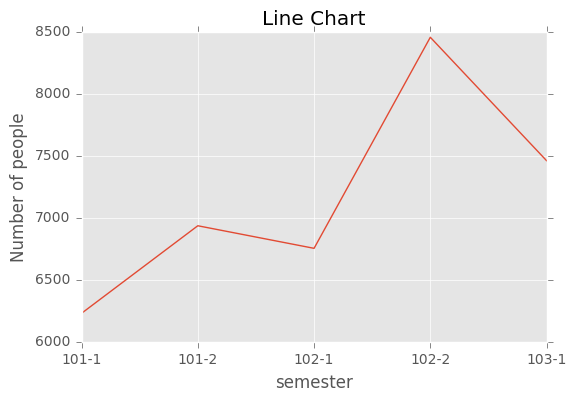

In [64]:
#Line Chart  折線圖
x=[1,2,3,4,5]
plt.xticks(x,['101-1','101-2','102-1','102-2','103-1']) #X軸刻度名稱
plt.plot(x,df4['Number of people'])
plt.title('Line Chart')
plt.ylabel('Number of people')
plt.xlabel('semester')
plt.show()

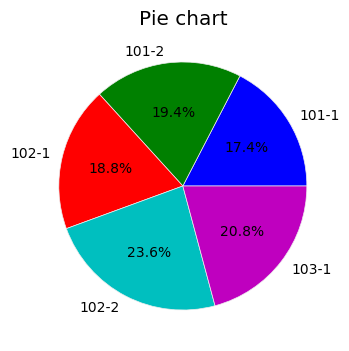

In [46]:
#圓餅圖
labels=['101-1','101-2','102-1','102-2','103-1']
plt.figure(figsize=(4,4)) #圖的大小
plt.pie(df4['Number of people'],labels=labels,autopct='%1.1f%%')
plt.title('Pie chart')
plt.show()

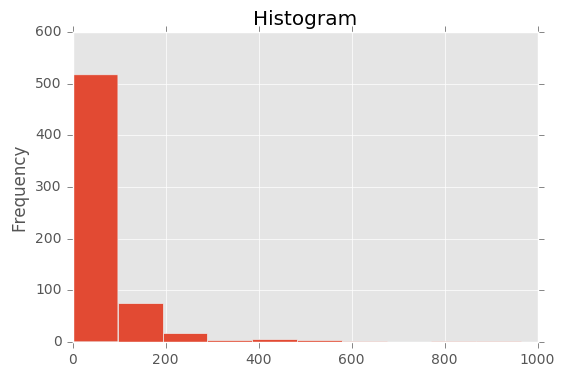

In [47]:
# 以pandas 實現直方圖
# 以每間學校來看全部的出國交流人數總和數量分佈
df3['Number of people'].plot(kind='hist',title='Histogram',figsize=(6,4))

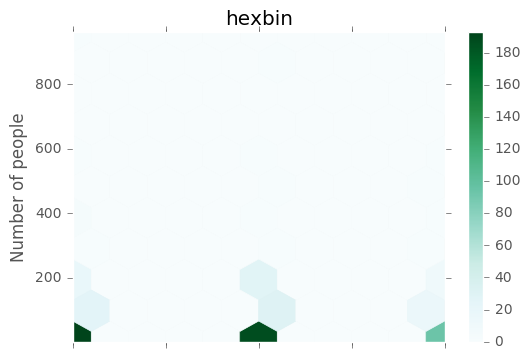

In [48]:
#蜂窩圖
# 每一年以每間學校，來觀測出國交流人數的數量分佈
plt.rcParams['axes.unicode_minus']=False  #如果負號不見，須加這行
a=[1,2,3,4,5]
df3.plot(kind='hexbin',title='hexbin',x='Academic year',y='Number of people',gridsize=10)

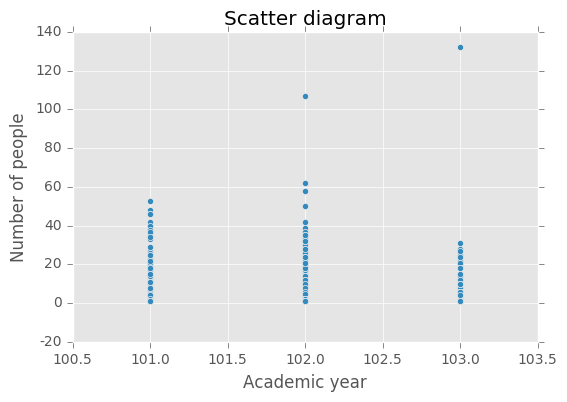

In [49]:
#散佈圖
# 每一年以每間學校，來觀測出國交流人數的數量分佈
df.plot(kind='scatter',title='Scatter diagram',figsize=(6,4),x='Academic year',y='Number of people')

# 6.基礎機器學習
K-means分群與視覺化

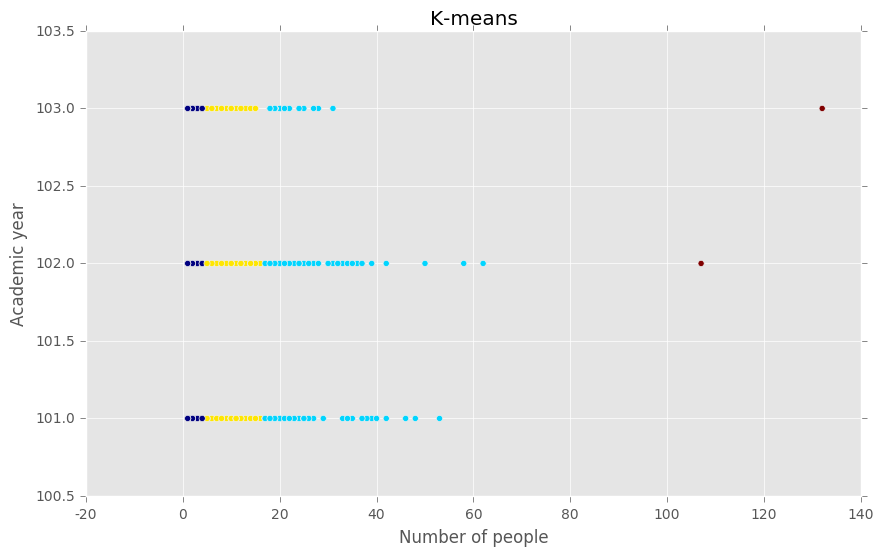

In [50]:
# 每一年以每間學校，來觀測出國交流人數的數量分佈
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#df.salary = df.salary.astype(float)                   #traform into float type
#df.working = df.working.astype(float)                 #traform into float type
X = df[['Number of people','Academic year']].values                   #tranform DataFrame to ndarray Matrix 

km = KMeans(n_clusters=4)   #創建HMeanx物件，先給定 n_clusters=4
y_pred = km.fit_predict(X)  #把不同變數做分群，之後會有Y值出現
plt.figure(figsize=(10, 6))
plt.xlabel('Number of people')
plt.ylabel('Academic year')
plt.scatter(X[:, 0], X[:, 1], c=y_pred)  #把X兩個變項放入，C為不同的維度
plt.title('K-means')
plt.show()

In [51]:
km.cluster_centers_ #各群中心點

array([[   1.35478816,  101.86600996],
       [  24.83443709,  101.82119205],
       [   7.84307692,  101.78461538],
       [ 119.5       ,  102.5       ]])